<a href="https://colab.research.google.com/github/vedictak/Thyroid-Disease-Clasification/blob/main/Thyroid_disease_classification_Forza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Load dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# list of column names
columns = ["Age", "Sex", "On Thyroxine", "Query on Thyroxine", 
           "On Antithyroid Medication", "Sick", "Pregnant", 
           "Thyroid Surgery", "I131 Treatment", "Query Hypothyroid", 
           "Query Hyperthyroid", "Lithium", "Goitre", "Tumor", 
           "Hypopituitary", "Psych", "TSH Measured", "TSH", "T3 Measured", 
           "T3", "TT4 Measured", "TT4", "T4U Measured", "T4U", 
           "FTI Measured", "FTI", "TBG Measured", "TBG", "Referral Source", "Category"]

In [ ]:
# reading dataset
data=pd.read_csv('/content/data.csv',na_values='?',header=None, names=columns)

In [ ]:
# extract category names from target column values 
data.iloc[:,-1] = data.iloc[:,-1].str.extract('([a-zA-Z0-9\s]*)')[0].str.lower()

In [ ]:
# remove duplicate entries
data=data.drop_duplicates()

In [ ]:
# shuffling dataset
data = data.sample(frac = 1)

In [ ]:
# splitting features and target columns
X = data.iloc[:,:-1] 
y = data.iloc[:,-1]

In [ ]:
# generalise categories
y.replace(to_replace=['compensated hypothyroid','primary hypothyroid','secondary hypothyroid'], value='hypothyroid', inplace=True)
y.replace(to_replace=['goitre','hyperthyroid','t3 toxic'], value='hyperthyroid', inplace=True)

In [ ]:
X

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,Query Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH Measured,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source
1227,31.0,NaN,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.900,t,2.7,t,99.0,t,1.00,t,99.0,f,NaN,STMW
2771,71.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.500,t,2.0,t,96.0,t,1.05,t,92.0,f,NaN,SVI
2328,74.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.300,t,1.9,t,99.0,t,1.12,t,88.0,f,NaN,other
3840,72.0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,2.300,t,0.8,t,90.0,t,0.80,t,112.0,f,NaN,SVI
1715,15.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.600,t,2.4,t,100.0,f,NaN,f,NaN,f,NaN,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,59.0,F,f,f,f,t,f,f,f,f,f,f,f,f,f,f,t,7.100,t,1.9,t,98.0,t,1.11,t,88.0,f,NaN,SVHD
2390,34.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,4.100,t,4.0,t,159.0,t,1.62,t,98.0,f,NaN,STMW
90,63.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.025,t,1.6,t,124.0,t,0.89,t,139.0,f,NaN,other
1246,62.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.500,f,NaN,t,126.0,t,1.24,t,101.0,f,NaN,other


#### Exploratory Analysis of the Dataset 


In [ ]:
# print the names of the features
print("Features: ", list(X.columns))

# print the label types of target column
print("Labels: ", set(y))

Features:  ['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH', 'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U', 'FTI Measured', 'FTI', 'TBG Measured', 'TBG', 'Referral Source']
Labels:  {'sick', 'hyperthyroid', 'negative', 'hypothyroid'}


In [ ]:
print('Shape:',data.shape)
#Dataset comprises of 3221 observations and 30 characteristics (29 independant and 1 dependant)

Shape: (3221, 30)


In [ ]:
data.info()
# float -> numerical columns, object -> nominal/categorical columns 
# Data has 7 columns of float dtype, 23 of object(string) dtype
# 27 column has too many missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 1227 to 2316
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3220 non-null   float64
 1   Sex                        3094 non-null   object 
 2   On Thyroxine               3221 non-null   object 
 3   Query on Thyroxine         3221 non-null   object 
 4   On Antithyroid Medication  3221 non-null   object 
 5   Sick                       3221 non-null   object 
 6   Pregnant                   3221 non-null   object 
 7   Thyroid Surgery            3221 non-null   object 
 8   I131 Treatment             3221 non-null   object 
 9   Query Hypothyroid          3221 non-null   object 
 10  Query Hyperthyroid         3221 non-null   object 
 11  Lithium                    3221 non-null   object 
 12  Goitre                     3221 non-null   object 
 13  Tumor                      3221 non-null   ob

In [ ]:
data.describe()
### There is a large difference between 75th %tile and max value of 'DC' which implies that the outliers have notably larger values

,Age,TSH,T3,TT4,T4U,FTI,TBG
count,3220.000000,2974.000000,2632.000000,3079.000000,2945.000000,2947.000000,0.0
mean,52.532609,6.722840,1.963355,107.807665,0.989937,110.657550,NaN
std,20.381326,27.585818,0.928773,38.941172,0.194417,37.578197,NaN
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN
25%,37.000000,0.450000,1.500000,86.000000,0.870000,92.000000,NaN
50%,55.000000,1.500000,1.900000,102.000000,0.970000,106.000000,NaN
75%,68.000000,3.300000,2.300000,125.000000,1.080000,125.000000,NaN
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN


#####	Perform univariate analysis by plotting various charts 


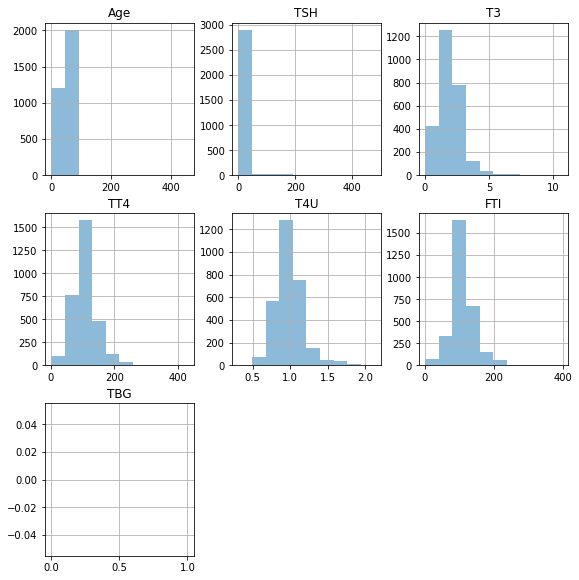

In [ ]:
# histograms
data.hist(alpha=0.5,figsize=(8,8))
plt.tight_layout(pad=0.5)
plt.show()

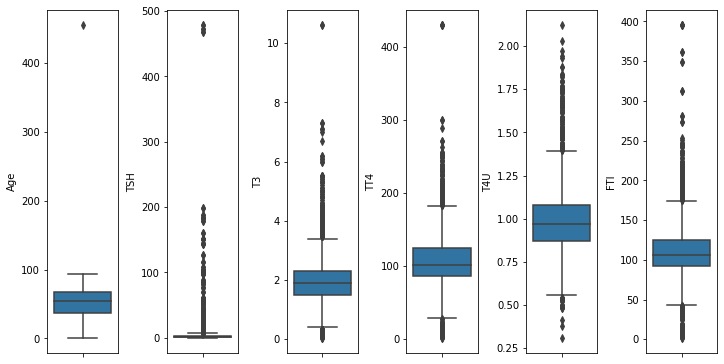

In [ ]:
# boxplots
# box plots to view distribution of values across their range and identify which columns have outliers
numeric_col = ['Age','TSH','T3','TT4','T4U','FTI']

fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(10, 5))
axs = axs.flatten()
i = 0
for c in numeric_col:
    sns.boxplot(y=c, data=data, ax=axs[i])
    i += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
# all numeric columns have a lot of outliers

##### Perform multivariate analysis 


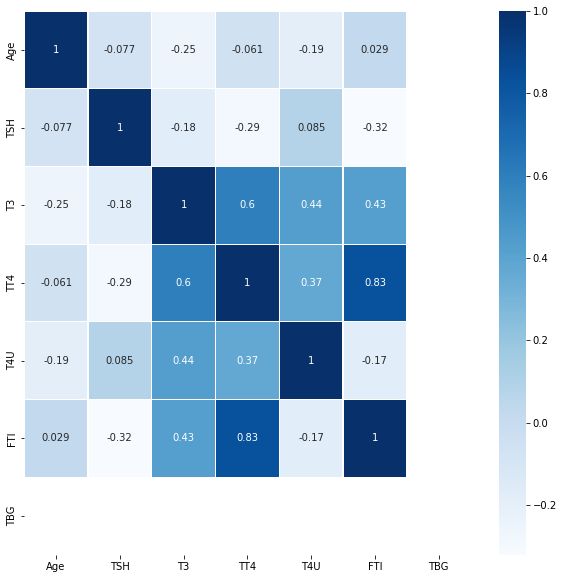

In [ ]:
# correlation matrix 
plt.figure(figsize=(10,10))
sns.heatmap(data=X.corr(),cmap='Blues',annot=True,linewidths=0.2)
# TT4 and FTI columns are highly correlated

#### Missing Value Imputation and removing any undesirable feature from the dataset.

In [ ]:
# {} column is unique to almost each row and does not contribute anything to the classification model
# {} column has too many null values
X = X.drop(['TBG','TBG Measured'],axis=1)

In [ ]:
# Imputing missing values using most_frequent strategy
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
X = pd.DataFrame(imp.fit_transform(X),columns=X.columns)

#### Encoding

In [ ]:
# function to one hot encode given column in given dataset
def ohe(data,i):
  # store one hot encoded columns in temp
  temp = pd.get_dummies(data[i],prefix=i)
  # store index of given column in t
  t = data.columns.get_loc(i)
  # drop given column 
  data = data.drop(labels=i,axis=1)
  # insert one hot encoded columns in index of the given column
  for i in range(temp.shape[1]-1,-1,-1):
    data.insert(t, temp.columns[i], temp.iloc[:,i],False)
  return data

# function to label encode given column in given dataset
def le(data,i):
  from sklearn.preprocessing import LabelEncoder 
  # standardize the string (remove apostrophes [if they exist] and lowercase all alphabets)
  #data[i] = data[i].str.extract('\'?([a-zA-Z\s\-\[\]\/]*)\'?')[0].str.lower()
  # label encode given column
  data[i] = pd.DataFrame(LabelEncoder().fit_transform(data[i]),columns=[i])
  return data

# lists to store all column names which need to get one hot encoded or label encoded
# required for encoding of features sub-step of Accuracy Improvement Step 
#ohe_names=[] 
#le_names=[]

# iterate through all the columns in data
for i in X.columns:
  # if column values are not numeric
  if type(X[i][0]) not in (np.int64,np.float64):
    # if unique values in column are more than 5 then label encode the column
    if len(set(X[i]))>5: 
      X=le(X,i)
      #le_names.append(i) # append all column names which got label encoded
    # if unique values in column are less than equal to 5 one hot encode the column
    else: 
      X=ohe(X,i)
      #ohe_names.append(i) # append all column names which got one hot encoded

#d2 = X.copy() # for later step accuracy improvement by removal of some features

####Remove unwanted features/feature selection 


In [ ]:
from sklearn.feature_selection import SelectKBest
#apply SelectKBest class to extract top 15 best features using ANOVA f-score to evaluate
X = pd.DataFrame(SelectKBest(k=15).fit_transform(X,y))

#### Normalization

In [ ]:
# Normalising Data
from sklearn.preprocessing import MinMaxScaler
X = pd.DataFrame(MinMaxScaler().fit_transform(X),columns=X.columns)

#### Check for the outliers in the columns and treat the outliers if present.

In [ ]:
eps=1e-7
# do log transformation of columns with outliers till there are no outliers left (should run max twice)
while 1:
  # checking outliers by using skewness from normal distribution
  o_col=[]
  skew = X.skew()
  for c in X.columns:
    if abs(skew[c])>1:
      o_col.append(c)
  # end the loop if there are no columns with outliers
  if not o_col: break
  # treating outliers by log transforming all columns with skewness
  for c in o_col:
      X[c] = np.maximum(np.full(X[c].shape, eps), np.minimum(np.full(X[c].shape, 1-eps), X[c]))
      X[c] = np.log10(X[c])
  break

#### Split the dataset into train and test. 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Construct models 

In [ ]:
def pred(model,X_train,X_test):
  return model.predict(X_train),model.predict(X_test)

In [ ]:
y_train_pred_bef=[]
y_test_pred_bef=[]

y_train_pred_af=[]
y_test_pred_af=[]

model_bef=[]
model_af=[]

model_names=['Logistic Regression','Naive Bayes','Decision Tree','Random Forest','SVM','Gradient Boost','Adaboost','Bagging']

##### Logistic Regression 

In [ ]:
# logistic regression and naive bayes have not particularly tuned 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000).fit(X_train, y_train) 
train_pred,test_pred = pred(model,X_train,X_test) 

y_train_pred_bef.append(train_pred)
y_test_pred_bef.append(test_pred)
model_bef.append(model)

y_train_pred_af.append(train_pred)
y_test_pred_af.append(test_pred)
model_af.append(model)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##### Naive Bayes  

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train,y_train)
train_pred,test_pred = pred(model,X_train,X_test) 

y_train_pred_bef.append(train_pred)
y_test_pred_bef.append(test_pred)
model_bef.append(model)

y_train_pred_af.append(train_pred)
y_test_pred_af.append(test_pred)
model_af.append(model)

##### Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train, y_train)
train_pred,test_pred = pred(model,X_train,X_test) 

y_train_pred_bef.append(train_pred)
y_test_pred_bef.append(test_pred)
model_bef.append(model)

In [ ]:
# removed some non-crucial parameters because the default google colab environment is not designed for compute intensive machine learning workload
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param = {#'criterion'               :['gini','entropy'],
         #'splitter'                :['best','random'],
         'max_depth'               :[None,2,5],
         'min_samples_split'       :[2,3,4],
         'min_samples_leaf'        :[1,2,3],
         #'min_weight_fraction_leaf':[0,0.1,0.2],
         'max_leaf_nodes'          :[None,2,3],
         #'min_impurity_decrease'   :[0,0.1,0.2],
         'class_weight'            :[None,'balanced'],
         #'ccp_alpha'               :[0,0.1,0.2]
         }
model = DecisionTreeClassifier(random_state=1,max_features='auto')
clf = GridSearchCV(model,param)
clf.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_features='auto',
                                              random_state=1),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 2, 5],
                         'max_leaf_nodes': [None, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
best_model = clf.best_estimator_
print('Parameters of Best Decision Tree Model: ')
for k,i in clf.best_params_.items():
  print('{}: {}'.format(k,i))

Parameters of Best Decision Tree Model: 
class_weight: None
max_depth: None
max_leaf_nodes: 2
min_samples_leaf: 1
min_samples_split: 2


In [ ]:
train_pred,test_pred = pred(best_model,X_train,X_test) 

y_train_pred_af.append(train_pred)
y_test_pred_af.append(test_pred)
model_af.append(best_model)

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train,y_train)
train_pred,test_pred = pred(model,X_train,X_test) 

y_train_pred_bef.append(train_pred)
y_test_pred_bef.append(test_pred)
model_bef.append(model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param = {'n_estimators'            :[2,3,5,10],
         #'criterion'               :['gini','entropy'],
         'max_depth'               :[None,1,2],
         'min_samples_split'       :[2,70,0.05], 
         'min_samples_leaf'        :[0.01,0.02,0.03],
         #'min_weight_fraction_leaf':[0,0.1,0.2],
         #'max_features'            :[None,'sqrt','log2'],
         #'max_leaf_nodes'          :[None,2,3],
         'min_impurity_decrease'   :[0,0.1,0.2],
         #'bootstrap'               :[True,False],
         #'oob_score'               :[True,False], 
         #'n_jobs'                  :[None,-1,2],
         #'random_state'            :[None,1,2],
         #'class_weight'            :[None,'balanced'],
         #'ccp_alpha'               :[0,0.1,0.2],
         #'max_samples'             :[None,25,50]
         }
model = RandomForestClassifier()
clf = GridSearchCV(model,param)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 2],
                         'min_impurity_decrease': [0, 0.1, 0.2],
                         'min_samples_leaf': [0.01, 0.02, 0.03],
                         'min_samples_split': [2, 70, 0.05],
                         'n_estimators': [2, 3, 5, 10]})

In [ ]:
best_model = clf.best_estimator_
print('Parameters of Best Random Forest Model: ')
for k,i in clf.best_params_.items():
  print('{}: {}'.format(k,i))

Parameters of Best Random Forest Model: 
max_depth: None
min_impurity_decrease: 0
min_samples_leaf: 0.01
min_samples_split: 0.05
n_estimators: 10


In [ ]:
train_pred,test_pred = pred(best_model,X_train,X_test) 

y_train_pred_af.append(train_pred)
y_test_pred_af.append(test_pred)
model_af.append(best_model)

##### SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(class_weight='balanced').fit(X_train, y_train)
train_pred,test_pred = pred(model,X_train,X_test) 

y_train_pred_bef.append(train_pred)
y_test_pred_bef.append(test_pred)
model_bef.append(model)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param = {'C'        :[1,2,4,8], 
         'kernel'   :['poly', 'rbf', 'sigmoid'],
         'degree'   :[3,4,5],
         'gamma'    :['auto','scale']
        }
model = SVC(class_weight='balanced')
clf = GridSearchCV(model,param)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 2, 4, 8], 'degree': [3, 4, 5],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [ ]:
best_model = clf.best_estimator_
print('Parameters of Best SVC Model: ')
for k,i in clf.best_params_.items():
  print('{}: {}'.format(k,i))

Parameters of Best SVC Model: 
C: 2
degree: 5
gamma: auto
kernel: poly


In [ ]:
train_pred,test_pred = pred(best_model,X_train,X_test) 

y_train_pred_af.append(train_pred)
y_test_pred_af.append(test_pred)
model_af.append(best_model)

##### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier().fit(X_train, y_train)
train_pred,test_pred = pred(model,X_train,X_test) 

y_train_pred_bef.append(train_pred)
y_test_pred_bef.append(test_pred)
model_bef.append(model)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param = {#'loss'                     :['deviance','exponential'], 
         'learning_rate'            :[0.1],
         'n_estimators'             :[100],
         #'subsample'                :[],
         'min_samples_split'        :[2,70,0.05], 
         'min_samples_leaf'         :[0.01,0.02,0.03],
         #'min_weight_fraction_leaf' :[],
         'max_depth'                :[None, 1, 2],
         #'min_impurity_decrease'    :[],
         'random_state'             :[1]
        }
model = GradientBoostingClassifier()
clf = GridSearchCV(model,param)
clf.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': [None, 1, 2],
                         'min_samples_leaf': [0.01, 0.02, 0.03],
                         'min_samples_split': [2, 70, 0.05],
                         'n_estimators': [100], 'random_state': [1]})

In [ ]:
best_model = clf.best_estimator_
print('Parameters of Best Gradient Boost Model: ')
for k,i in clf.best_params_.items():
  print('{}: {}'.format(k,i))

Parameters of Best Gradient Boost Model: 
learning_rate: 0.1
max_depth: 1
min_samples_leaf: 0.03
min_samples_split: 2
n_estimators: 100
random_state: 1


In [ ]:
train_pred,test_pred = pred(best_model,X_train,X_test) 

y_train_pred_af.append(train_pred)
y_test_pred_af.append(test_pred)
model_af.append(best_model)

##### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier().fit(X_train, y_train)
train_pred,test_pred = pred(model,X_train,X_test) 

y_train_pred_bef.append(train_pred)
y_test_pred_bef.append(test_pred)
model_bef.append(model)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

param = {'base_estimator'           :[None,LogisticRegression(),GaussianNB()],
         'n_estimators'             :[5,10,15,50],
         'learning_rate'            :[1.0],
         'random_state'             :[1]
        }
model = AdaBoostClassifier()
clf = GridSearchCV(model,param)
clf.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [None, LogisticRegression(),
                                            GaussianNB()],
                         'learning_rate': [1.0],
                         'n_estimators': [5, 10, 15, 50], 'random_state': [1]})

In [ ]:
best_model = clf.best_estimator_
print('Parameters of Best AdaBoost Model: ')
for k,i in clf.best_params_.items():
  print('{}: {}'.format(k,i))

Parameters of Best AdaBoost Model: 
base_estimator: LogisticRegression()
learning_rate: 1.0
n_estimators: 10
random_state: 1


In [ ]:
train_pred,test_pred = pred(best_model,X_train,X_test) 

y_train_pred_af.append(train_pred)
y_test_pred_af.append(test_pred)
model_af.append(best_model)

##### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier().fit(X_train,y_train)
train_pred,test_pred = pred(model,X_train,X_test) 

y_train_pred_bef.append(train_pred)
y_test_pred_bef.append(test_pred)
model_bef.append(model)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
param = {'base_estimator'          :[None,LogisticRegression(max_iter=1000),GaussianNB()],
         'n_estimators'            :[5,10,15],
         'max_samples'             :[1.0,100,0.5],
         #'max_features'            :[1.0,5,0.5],
         #'bootstrap'               :[True,False],
         #'bootstrap_features'      :[True,False],
         #'oob_score'               :[True,False], 
         #'n_jobs'                  :[None,-1,2],
         'random_state'            :[1],
         }
model = BaggingClassifier()
clf = GridSearchCV(model,param)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'base_estimator': [None,
                                            LogisticRegression(max_iter=1000),
                                            GaussianNB()],
                         'max_samples': [1.0, 100, 0.5],
                         'n_estimators': [5, 10, 15], 'random_state': [1]})

In [ ]:
best_model = clf.best_estimator_
print('Parameters of Best Bagging Classifier Model: ')
for k,i in clf.best_params_.items():
  print('{}: {}'.format(k,i))

Parameters of Best Bagging Classifier Model: 
base_estimator: LogisticRegression(max_iter=1000)
max_samples: 0.5
n_estimators: 5
random_state: 1


In [ ]:
train_pred,test_pred = pred(best_model,X_train,X_test) 

y_train_pred_af.append(train_pred)
y_test_pred_af.append(test_pred)
model_af.append(best_model)

#### Model Comparison

In [ ]:
model_bef
# all models before tuning

[LogisticRegression(max_iter=1000),
 GaussianNB(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 SVC(class_weight='balanced'),
 GradientBoostingClassifier(),
 AdaBoostClassifier(),
 BaggingClassifier()]

In [ ]:
model_af
# all models after tuning

[LogisticRegression(max_iter=1000),
 GaussianNB(),
 DecisionTreeClassifier(max_features='auto', max_leaf_nodes=2, random_state=1),
 RandomForestClassifier(min_impurity_decrease=0, min_samples_leaf=0.01,
                        min_samples_split=0.05, n_estimators=10),
 SVC(C=2, class_weight='balanced', degree=5, gamma='auto', kernel='poly'),
 GradientBoostingClassifier(max_depth=1, min_samples_leaf=0.03, random_state=1),
 AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=10,
                    random_state=1),
 BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000),
                   max_samples=0.5, n_estimators=5, random_state=1)]

In [ ]:
# Apply classification metrics such as confusion matrix, precision, recall, f-measure etc. 
def classification_metrics(y_true,y_pred,beta=1,ret=[]):
  import numpy as np
  from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, fbeta_score, accuracy_score, roc_auc_score
  np.seterr(divide='ignore', invalid='ignore')

  classification_report = classification_report(y_true,y_pred)
  confusion_matrix = confusion_matrix(y_true,y_pred)

  FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
  FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
  TP = np.diag(confusion_matrix)
  TN = confusion_matrix.sum() - (FP + FN + TP)
  FPR = FP/(FP+TN) # aka Type 1 Error, Type I Error
  FNR = FN/(FN+TP) # aka Type 2 Error, Type II Error 
  TPR = TP/(TP+FN) # aka Recall, Sensitivity
  TNR = TN/(TN+FP) # aka Specificity

  precision, TPR, f1_score, support = precision_recall_fscore_support(y_true,y_pred,zero_division=0)
  try: accuracy = accuracy_score(y_true,y_pred)
  except: accuracy = 0
  try: roc_auc_score = roc_auc_score(y_true,y_pred)
  except: roc_auc_score = 0

  if ret == 'all': 
    beta = 2 
    ret = ['classification_report','confusion_matrix','fpr','fnr','tpr','tnr','precision','f1_score','fbeta_score','accuracy','auc']
  
  scores=[]
  for i in ret:
    if i == 'classification_report': print('Classification Report:\n',classification_report);
    elif i == 'confusion_matrix': scores.append(confusion_matrix);
    elif i in ('fpr','type_1_error','type_I_error'): scores.append(FPR);
    elif i in ('fnr','type_2_error','type_II_error'): scores.append(FNR);
    elif i in ('tpr','recall','sensitivity'): scores.append(TPR);
    elif i in ('tnr','specificity'): scores.append(TNR)
    elif i == 'precision': scores.append(precision)
    elif i == 'f1_score': scores.append(f1_score)
    elif i == 'fbeta_score': 
      try: scores.append(fbeta_score(y_true,y_pred,beta=beta,zero_division=1))
      except: scores.append(0)
    elif i in ('accuracy','accuracy_score'): scores.append(accuracy)
    elif i in ('roc_auc','roc_auc_score','auc','auc_score'): scores.append(roc_auc_score)
  if not scores: return None
  return scores

#def_metrics = classification_metrics(y_test,y_pred,ret='all')

##### training accuracy scores before hyperparameter tuning

In [ ]:
toot_train=[]
for y_pred in y_test_pred_bef:
  toot_train.append(classification_metrics(y_test,y_pred,ret=['accuracy_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/li

In [ ]:
toot_train
# train accuracy before tuning

[[0.8449131513647643],
 [0.6240694789081885],
 [0.7382133995037221],
 [0.749379652605459],
 [0.5620347394540943],
 [0.7568238213399504],
 [0.8449131513647643],
 [0.750620347394541]]

##### testing accuracy scores before hyperparameter tuning

In [ ]:
toot=[]
for y_pred in y_test_pred_bef:
  toot.append(classification_metrics(y_test,y_pred,ret=['accuracy_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/li

In [ ]:
toot
# accuracy before tuning

[[0.8449131513647643],
 [0.6240694789081885],
 [0.7382133995037221],
 [0.749379652605459],
 [0.5620347394540943],
 [0.7568238213399504],
 [0.8449131513647643],
 [0.750620347394541]]

##### training accuracy scores after hyperparameter tuning

In [ ]:
something_train=[]
for y_pred in y_test_pred_af:
  something_train.append(classification_metrics(y_test,y_pred,ret=['accuracy_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/li

In [ ]:
something_train
# train scores after tuning

[[0.8449131513647643],
 [0.6240694789081885],
 [0.8535980148883374],
 [0.8535980148883374],
 [0.7816377171215881],
 [0.8349875930521092],
 [0.8498759305210918],
 [0.8548387096774194]]

##### testing accuracy scores after hyperparameter tuning

In [ ]:
something=[]
for y_pred in y_test_pred_af:
  something.append(classification_metrics(y_test,y_pred,ret=['accuracy_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/li

In [ ]:
something
# test scores after tuning

[[0.8449131513647643],
 [0.6240694789081885],
 [0.8535980148883374],
 [0.8535980148883374],
 [0.7816377171215881],
 [0.8349875930521092],
 [0.8498759305210918],
 [0.8548387096774194]]

##### testing f1-scores before hyperparameter tuning 

In [ ]:
f1_test_bef = []
for i in range(len(y_test_pred_bef)): 
  f1_test_bef.append(classification_metrics(y_test,y_test_pred_bef[i],ret=['f1_score'])[0])


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/li

In [ ]:
f1_test_bef

[array([0.24      , 0.36363636, 0.91862069, 0.13333333]),
 array([0.34666667, 0.36363636, 0.73480176, 0.2310231 ]),
 array([0.18518519, 0.16      , 0.85059172, 0.02469136]),
 array([0.05      , 0.03846154, 0.85631769, 0.        ]),
 array([0.26315789, 0.32432432, 0.6493756 , 0.23529412]),
 array([0.13043478, 0.07407407, 0.86251809, 0.02631579]),
 array([0.4       , 0.36111111, 0.91947694, 0.        ]),
 array([0.12765957, 0.09009009, 0.85756026, 0.07058824])]

##### testing f1-scores after hyperparameter tuning 

In [ ]:
f1_test_af = []
for i in range(len(y_test_pred_af)): 
  f1_test_af.append(classification_metrics(y_test,y_test_pred_af[i],ret=['f1_score'])[0])


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/li

In [ ]:
f1_test_af

[array([0.24      , 0.36363636, 0.91862069, 0.13333333]),
 array([0.34666667, 0.36363636, 0.73480176, 0.2310231 ]),
 array([0.        , 0.        , 0.92461641, 0.        ]),
 array([0.        , 0.30136986, 0.91983696, 0.        ]),
 array([0.32835821, 0.42767296, 0.86124402, 0.40909091]),
 array([0.15384615, 0.2745098 , 0.90692792, 0.03636364]),
 array([0.        , 0.        , 0.92317969, 0.        ]),
 array([0.        , 0.        , 0.92317969, 0.        ])]

##### stratified k-fold for k=10


In [ ]:
from sklearn.model_selection import StratifiedKFold

kX = np.array(X)
ky = np.array(y)

fin_acc=[]

for lr in model_af:
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
  lst_accu_stratified = []
  for train_index, test_index in skf.split(kX, ky):
      x_train_fold, x_test_fold = kX[train_index], kX[test_index]
      y_train_fold, y_test_fold = ky[train_index], ky[test_index]
      lr.fit(x_train_fold, y_train_fold)
      lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
  fin_acc.append(np.mean(lst_accu_stratified))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
fin_acc
# max = 0.8547035747937619

[0.8516037536295983,
 0.5631675095667559,
 0.8547035747937619,
 0.8543930157875506,
 0.7655933311539719,
 0.8404245908889874,
 0.8537718977751283,
 0.8531527027286888]

##### Best Model 

In [ ]:
model_af[something.index(max(something))]
# model with best accuracy 

DecisionTreeClassifier(max_features='auto', max_leaf_nodes=2, random_state=1)

In [ ]:
max(something)[0]*100
# best accuracy

85.98014888337468